#From the Izhikevich ABC formulation to the I-V form

Seb James, Adaptive Behaviour Research Group, Dept. Psychology, University of Sheffield

June 2015

## Introduction

In a 2003 paper entitled "Simple Model of Spiking Neurons", Eugene Izhikevich introduced a dynamical system which can reproduce a wide range of the spiking behaviour seen in real neurons. He followed up with a description of the model in his 2007 book "Dynamical Systems in Neuroscience". His "Simple Model" has been used by many computational neuroscience researchers due to its richness of behaviour and low computational cost.

He presents the model in a couple of forms. The first of which, given in the paper, is what I'll refer here to as the "ABC" form; the second form makes contact with the biological parameters of the neuron and is named the "I-V" form. 

Suppose you have an Izhikevich Simple Model given in the ABC form which is:

$$ \dot{v} = Av^2 + Bv + C - u + I \tag{1} $$
$$ \dot{u} = a(bv - u) \tag{2} $$

where if $v > v_{peak}$ then $v \leftarrow c; u \leftarrow u + d$

$v$ is the membrane voltage, $u$ is a recovery variable, $A$, $B$ and $C$, $a$, $b$, $c$ and $d$ are dimensionless model parameters and $v_{peak}$ is the reset voltage.

You may be starting from one of the canonical models given in the 2003 IEEE paper, with a plan to tweak the parameters. Perhaps you like the thalamo-cortical neuron for which:

$$A=0.04; B=5; C=140; a=0.02; b=0.25; c=-65; d=0.05; v_{peak}=30$$

(See Fig. 2, TC from Izhikevich, 2003.)

So that:

$$ \dot{v} = 0.04v^2 + 5v + 140 - u + I $$
$$ \dot{u} = 0.02(0.25v - u) $$
$$ v > 30: v \leftarrow -65; u \leftarrow u + 0.05 $$

How do you convert this into the equivalent I-V form of the Simple Model? This is the question I'll address in this tutorial article.

## Graphing the ABC form

Let's first graph the vector field and the nullclines for this system to see what it looks like. First up, we'll import the matplotlib and numpy libraries, which are used in the rest of this notebook.

In [1]:
# Setup first
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Now we'll set up model parameters and some parameters used to select ranges over which we'll compute the nullclines and vector field of the system.

In [77]:
# Model parameters
A=0.04;
B=5;
C=140;
a=0.02;
b=0.25;
c=-65;
d=0.05;
vpeak=30;
I=-1; # constant input current

# Graphing parameters
lowerV = -120;
upperV = 30;
qvlowerv = lowerV;
qvupperv = upperV;
qvloweru = -20;
qvupperu = 40;
qpscale = 3;
qpdivisor = .00001;

Having set up the parameters, lets compute nullclines and the vector field. The vector field is simply the solution to Equations (1) and (2). The nullclines are the lines at which the components of the vector fields are zero. The v nullcline is found by setting Equation (1) to zero and rearranging to give $u$ in terms of $v$:

$$\dot{v} = Av^2 + Bv + C - u + I = 0$$
$$\implies u = Av^2 + Bv + C + I$$

Similarly for the u nullcline, set Eq. (2) to zero and rearrange:

$$\dot{u} = a(bv - u) = 0$$
$$\implies bv - u = 0$$
$$\implies u = bv$$

The same thing in python looks like:

In [78]:
# Compute nullclines
Vn = np.linspace (lowerV, upperV, 1000);
nc_v = A*Vn*Vn + B*Vn + C + I;
nc_u = b * Vn;
        
# Compute vector field
thescale = abs(qvlowerv-qvupperv)/qpscale;
Vgv = np.linspace(qvlowerv, qvupperv, thescale);
ugv = np.linspace(qvloweru, qvupperu, thescale);
Vg, ug = np.meshgrid(Vgv, ugv);
vdot = A*Vg*Vg + B*Vg + C - ug + I;
udot = a*(b*Vg - ug);

We can now graph nc_v, nc_u, vdot and udot in the $v/u$ phase plane:

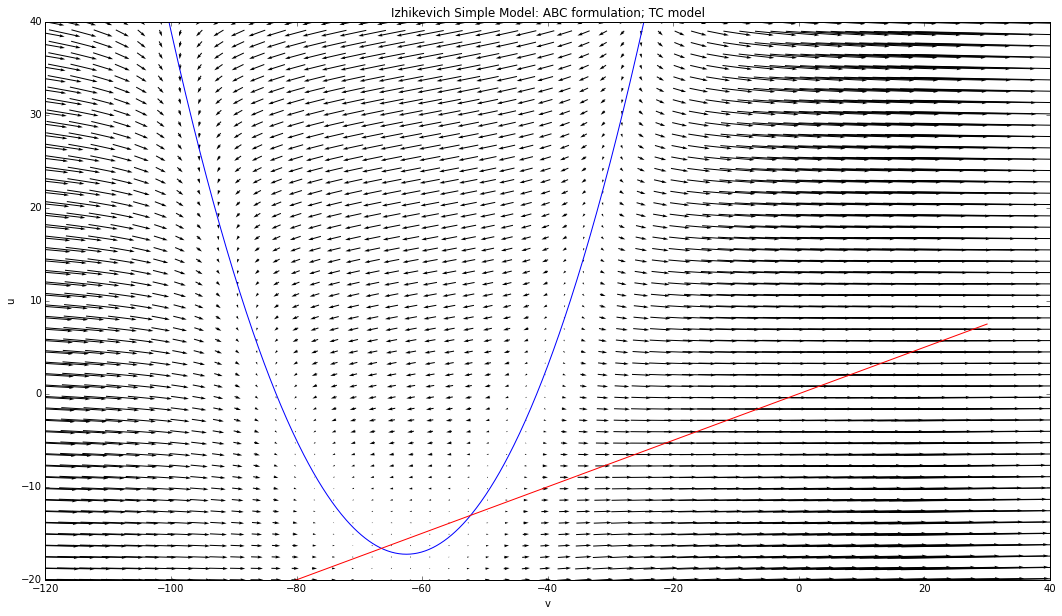

In [79]:
plt.figure(figsize=(18,10))
plt.clf;

Q = plt.quiver(Vg, ug, vdot, udot*10, pivot='mid', color='k', width=0.001, scale=2000)
lef,rgt,bot,top = plt.axis()
plt.axis([lef, rgt, bot, top])

plt.plot(Vn, nc_v, color='b')
plt.plot(Vn, nc_u, color='r')

plt.title('Izhikevich Simple Model: ABC formulation; TC model')
plt.xlabel('v');
plt.ylabel('u');

In the graph above, the arrows represent the magnitudes of $\dot{u}$ and $\dot{v}$ for different values of $u$ and $v$. The blue curve is the quadratic nullcline for $\dot{v}=0$ and the red line is the nullcline for $\dot{u}=0$.

## Converting to the I-V form
Now we get to the nub of this article. Suppose you'd prefer to work with the Simple Model expressed in the I-V form:

$$ C_a \dot{v} = k(v-v_r)(v-v_t) - u' + I' \tag{3} $$
$$ \dot{u'} = a'(b'(v-v_r) - u') \tag{4} $$

$$ v > v_{peak}: v \leftarrow c'; u' \leftarrow u' + d' $$

Where here, $C_a$ is the capacitance, $k$ is a dimensionless parameter, $v_r$ is the resting potential, $v_t$ is a threshold potential and $a'$, $b'$, $c'$ and $d'$ are dimensionless model parameters as before. The recovery variable u is expressed as $u'$, in case a change of variables should prove necessary (it will!). The current is expressed as $I'$ for the same reason. We'll assume that $v$ does not require any scaling as ultimately we want the I-V model to reproduce the same function $v(t)$ as the ABC model.

How can we translate from the "ABC" formulation given by Izhikevich into this form, which he gives in his 2007 book? Can we express Equations (1) and (2) in this form to produce the identical phase plane diagram above?


There are a couple of problems. The first is that the variable $v$ in Eq. (2) has been replaced with $(v-v_r)$, meaning that the $\dot{u}$ nullcline passes through the root of the quadratic. To see this, set $\dot{u'}=0$ in Eq. (4):

$$ \dot{u'} = a'(b'(v-v_r) - u') = 0 $$
$$\implies u' = b'(v-v_r) $$


From this, it's clear that $u'(v) = 0$ for $v=v_r$, whereas in the ABC formulation, for which the $\dot{u}$ nullcline is $u=bv$, $u(v)=0$ for $v=0$. This means the two formulations could never be identical if $v$ and $u$ are unscaled. To solve this problem, we have to scale the $u$ variable.

The second problem will follow from this necessary change of variable in $u$, but we'll come to that after considering how to achieve the $u$ scaling.

###The linear nullcline and scaling $u$
Let's look at the equations for $\dot{u}$ in the two formulations of the Simple Model.

$$ \dot{u} = a(bv - u) \tag{2} $$
and
$$ \dot{u'} = a'(b'(v-v_r) - u') \tag{4} $$

Let's linearly scale the $u$ variable as follows. Let

$$ u' = mu + u_0 $$

Now apply the chain rule for differentiation:

$$ \dot{u'} =  {du'\over dt} = {du'\over du}{du \over dt} = m {du\over dt} = m \dot{u} $$

we can then write Eq. (4) like this:

$$ m \dot{u} = a'(b'(v-v_r) - m u - u_0) \tag{4a}$$

Now consider the nullcline for this system; the set of solutions to:

$$ m \dot{u} = a'(b'(v-v_r) - C_a u -u_0) = 0 $$
$$\implies b'(v-v_r) - C_a u - u_0 = 0$$
$$\implies b'(v-v_r) - u_0 = m u$$ 
$$\implies u = { b' (v-v_r)\over m} - {u_0\over m}$$
$$\implies u = { b' v\over m} - { b' v_r\over m} -   {u_0\over m}\tag{5}$$

Now compare Eq. (5) with the nullcline of Eq. (2):

$$ \dot{u} = a(bv - u) = 0 $$
$$ \implies u = bv$$

These are *not* the same lines unless we let $b={b'\over m}$ and $u_0=-b' v_r = -bmv_r$. So our scaling for $u$ is:

$$ u' = mu - b m v_r \tag{6}$$

In this case, our equation for $\dot{u}$ is (rewriting Eq. 4a):

$$ m \dot{u} = a' (m b (v-v_r) - mu + b m v_r) $$

$$ \implies \dot{u} = {a'\over m} (m b (v-v_r) - mu + b m v_r) $$

$$ \implies \dot{u} = a' (b (v-v_r) - u + b v_r) $$

We'll drop the prime on $a'$ here, as this is a scaling parameter and we'll now state that $a=a'$ to give the final equation for $\dot{u}$:

$$ \dot{u} = a (b (v-v_r) - u + b v_r) \tag{7}$$

### The quadratic nullcline
First, lets examine Eq. (3), substituting Eq. (6) for $u'$ and compare it with Eq. (1):

$$C_a \dot{v} = k(v-v_r)(v-v_t) - m u + bm v_r + I'$$

$$\implies \dot{v} = {k\over C_a}(v-v_r)(v-v_t) - {mu\over C_a} + {bmv_r\over Ca} +{I'\over C_a}$$

We haven't yet constrained the parameter $m$, but if $m=C_a$ then

$$ \dot{v} = {k\over C_a}(v-v_r)(v-v_t) - u + b v_r + {I'\over C_a} \tag{8}$$

compare with Eq (1):

$$\dot{v} = Av^2 + Bv + C - u + I \tag{1}$$

Note that if $m=C_a$ then our $u$ scaling - Eq. (6) - becomes:

$$ u' = C_a u - b C_a v_r \tag{9}$$

We're almost there. ${k\over C_a}(v-v_r)(v-v_t)$ can be equated with $Av^2 + Bv + C$ and we can make a change of variable in the injected current $I$ such that

$$I = b v_r + {I'\over C_a}$$

*alternatively* we could make ${k\over C_a}(v-v_r)(v-v_t) + b v_r$ equivalent to $Av^2 + Bv + C$ and instead let

$$I =  {I'\over C_a} \tag{10}$$

To avoid the offset in the injected current, we'll do the latter so that to make the models equivalent we need to find $k$, $C_a$, $v_r$ and $v_t$ such that 

$${k\over C_a}(v-v_r)(v-v_t) + b v_r = Av^2 + Bv + C$$

given that we know $A$, $B$, $C$ and $b$.

Expanding:

$$ {k\over C_a}[v^2 - (v_r+v_t)v + v_r v_t] + b v_r = Av^2 + Bv + C$$
$$ {k\over C_a}v^2 - {k\over C_a}(v_r+v_t)v + {k\over C_a} v_r v_t + b v_r = Av^2 + Bv + C$$
$$ \implies A = {k\over C_a} \qquad B = {k\over C_a}(v_r+v_t) \qquad C = {k\over C_a} v_r v_t + b v_r$$

Now solve for $v_r$ and then $v_t$. First $v_r$:

$$ B = A(v_r+v_t) \implies v_t = -v_r-{B\over A} $$

$$ C = A v_r v_t + b v_r \implies v_t = {C\over A v_r} - {b\over A}$$

$$ \implies A {v_r}^2 + (B-b) v_r + C = 0 $$

Given $A=0.04$, $B=5$, $b=0.25$ and $C=140$, the solutions of this quadratic equation are:

$$ v_r \approx -64.413911 \textrm{ or } v_r \approx -54.33608891 $$

Now solve for $v_t$:

$$ B = A(v_r+v_t) \implies v_r = -v_t-{B\over A} $$

$$ C = A v_r v_t + b v_r \implies v_r = {C\over A v_t + b} $$

$$ \implies A {v_t}^2 + (B+b)v_t + ({bB\over A} +C) = 0 $$

The solutions of this quadratic are:
$$ v_t \approx -60.5860875 \textrm{ or }  v_t \approx -70.6639125 $$

Substitute $v_r$ into 

$$B = A(v_r+v_t)$$

to find the paring between the solutions. Doing so gives

$$ v_r \approx −64.413911, v_t \approx −60.5860875 $$

or

$$ v_r \approx −54.33608891, v_t \approx -70.6639125 $$

We discard the second pair as we expect the resting potential, $v_r$ to be more negative than the threshold potential, $v_t$.
Finally, we consider $k$ and $C_a$. We know that $A={k\over C_a}$ but we have no other constraints. In this example, we'll let $C_a = 1$ so that $A=k$.

## Final unscaled I-V formulation

This means we can write out the final form of the Simple Model in our unscaled version of the I-V formulation:

$$ \dot{v} = {k\over C_a}(v-v_r)(v-v_t) - u + b v_r + I \tag{8a}$$

$$ \dot{u} = a (b (v-v_r) - u + b v_r) \tag{7}$$

## Scaled I-V formulation

We're going to  graph Eqs. (7) and (8a) below, but first, lets make contact with the typical I-V formulation, given in Izhikevich (2007).

Eqs. (7), (9), (10), $a=a'$, $b={b'\over C_a}$ and $\dot{u}={\dot{u'}\over C_a}$ imply that:

$$ {\dot{u'}\over C_a} = a' ({b'\over C_a} (v-v_r) - ({u'\over C_a} + b v_r) + b v_r) $$

$$ \implies \dot{u'} = a' (b'(v-v_r) - u') \tag{4}$$

Eqs. (8a), (9) and (10) imply that:

$$ C_a \dot{v} = k (v-v_r)(v-v_t) - C_a u + b C_a v_r + I' $$

$$ \implies C_a \dot{v} = k (v-v_r)(v-v_t) - u' + I' \tag{3} $$

which brings us back to the typical I-V form given in "Dynamical Systems in Neuroscience"

Note that to translate between the ABC formulation and the I-V form, *we have had to make tranformations of variables*:

$$u' = C_a u - b C_a v_r \tag{9}$$ 

$$I'=C_a I \tag{10a}$$

*It's not possible to translate between the two formulations of the models without such a transformation of variables.* Of course, this is not a big problem; we are typically interested in the time course of the $v$ variable; it is the spikes in this variable which define when our neuron transmits information to efferent neurons.

##Graphing the unscaled I-V form

Moment of truth! Lets set up our new set of parameters to graph equations (7) and (8).

In [74]:
# Model parameters
k=0.04;
Ca=k/0.04;
vr=-64.413911;
vt=-60.5860875;
a=0.02;
b=0.25;
c=-65;
d=0.05;
vpeak=30;
I=-1; # constant input current

# Graphing parameters
lowerV = -120;
upperV = 30;
qvlowerv = lowerV;
qvupperv = upperV;
qvloweru = -20;
qvupperu = 40;
qpscale = 3;
qpdivisor = .00001;

The vector field is the solution to Eqs. (7) and (8).

The nullclines are:

$$ \dot{v} = {k\over C_a}(v-v_r)(v-v_t) - u + b v_r + I = 0$$

$$ \implies u = {k\over C_a}(v-v_r)(v-v_t) + b v_r + I$$

and

$$ \dot{u} = a (b (v-v_r) - u + b v_r) = 0$$
$$\implies u = bv$$

In [75]:
# Compute nullclines
Vn = np.linspace (lowerV, upperV, 1000);
nc_v = (k/Ca)*(Vn-vr)*(Vn-vt) + b*vr + I;
nc_u = b * Vn;
        
# Compute vector field
thescale = abs(qvlowerv-qvupperv)/qpscale;
Vgv = np.linspace(qvlowerv, qvupperv, thescale);
ugv = np.linspace(qvloweru, qvupperu, thescale);
Vg, ug = np.meshgrid(Vgv, ugv);
vdot = (k/Ca)*(Vg-vr)*(Vg-vt) - ug + b*vr + I;
udot = a*(b*(Vg-vr) - ug + b*vr);

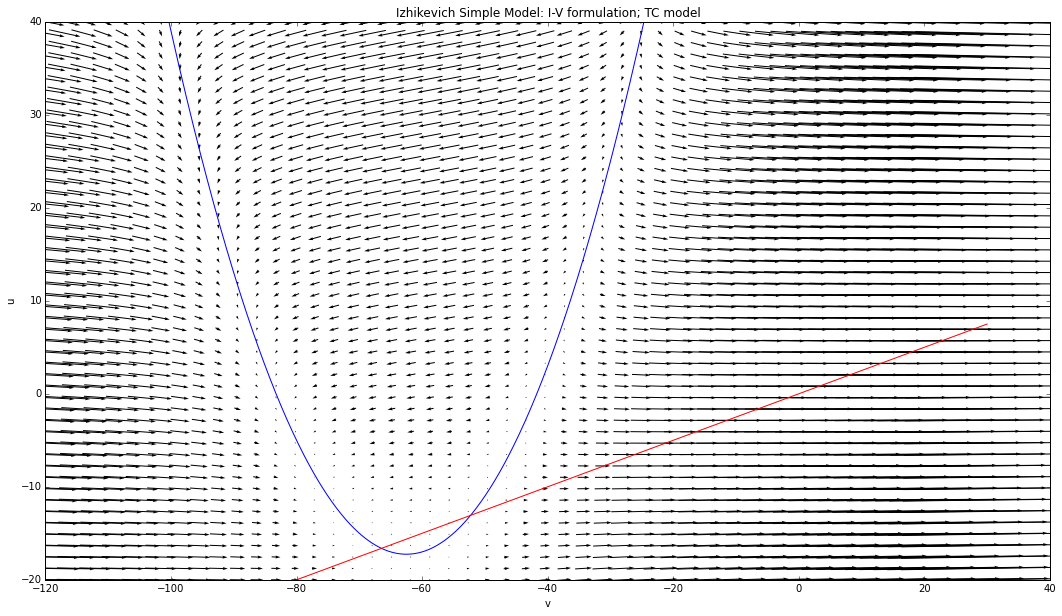

In [76]:
plt.figure(figsize=(18,10))
plt.clf;

Q = plt.quiver(Vg, ug, vdot, udot*10, pivot='mid', color='k', width=0.001, scale=2000)
lef,rgt,bot,top = plt.axis()
plt.axis([lef, rgt, bot, top])

plt.plot(Vn, nc_v, color='b')
plt.plot(Vn, nc_u, color='r')

plt.title('Izhikevich Simple Model: I-V formulation; TC model')
plt.xlabel('v');
plt.ylabel('u');

Compare this graph with the ABC graph. They're the same.

##Graphing the standard I-V form

Now lets graph equations (3) and (4):

$$C_a \dot{v} = k (v-v_r)(v-v_t) - u' + I' \tag{3} $$

$$\dot{u'} = a' (b'(v-v_r) - u') \tag{4}$$

with the scaling:

$$u' = C_a u - b C_a v_r \tag{9}$$ 

$$I'=C_a I \tag{10a}$$

$$b' = C_a b$$

Nullclines are:

$$u' = k (v-v_r)(v-v_t) + I'$$

$$u' = b'(v-v_r)$$

In the code that follows, I have "prime" parameters and variables and unprimed versions of the same.

In [71]:
# Model parameters
k=0.04;
Ca=k/0.04;
vr=-64.413911;
vt=-60.5860875;
a=0.02;
b=0.25;
bprime=b*Ca;
c=-65;
d=0.05;
vpeak=30;
I=-1; # constant input current
Iprime=I*Ca;

# Graphing parameters
lowerV = -120;
upperV = 30;
qvlowerv = lowerV;
qvupperv = upperV;

qvloweru = -20;
qvupperu = 40;
# Have to scale these u ranges:
qvloweruprime = Ca*qvloweru - b * Ca * vr;
qvupperuprime = Ca*qvupperu - b * Ca * vr;

qpscale = 3;
qpdivisor = .00001;

In [72]:
# Compute nullclines
Vn = np.linspace (lowerV, upperV, 1000);
nc_vprime = k*(Vn-vr)*(Vn-vt) + Iprime;
nc_uprime = bprime * (Vn-vr);
# Now scale the nullclines:
nc_v = nc_vprime*Ca - b*Ca*vr;
nc_u = nc_uprime*Ca - b*Ca*vr;

# Compute vector field
thescale = abs(qvlowerv-qvupperv)/qpscale;
Vgv = np.linspace(qvlowerv, qvupperv, thescale);
ugvprime = np.linspace(qvloweruprime, qvupperuprime, thescale);
Vg, ugprime = np.meshgrid(Vgv, ugvprime);
vdot = (k/Ca)*(Vg-vr)*(Vg-vt) - ugprime/Ca + Iprime/Ca;
udotprime = a*(bprime*(Vg-vr) - ugprime);
# scale
udot = udotprime / Ca;
ug = Ca*ugprime - b * Ca * vr;

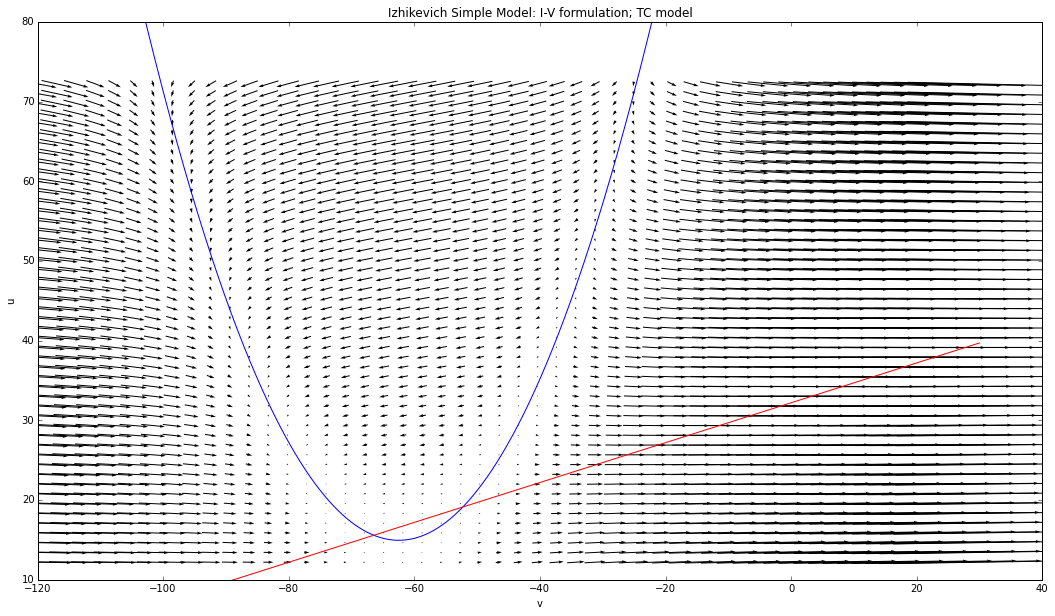

In [73]:
plt.figure(figsize=(18,10))
plt.clf;

Q = plt.quiver(Vg, ug, vdot, udot*10, pivot='mid', color='k', width=0.001, scale=2000)
lef,rgt,bot,top = plt.axis()
plt.axis([lef, rgt, bot, top])

plt.plot(Vn, nc_v, color='b')
plt.plot(Vn, nc_u, color='r')

plt.title('Izhikevich Simple Model: I-V formulation; TC model')
plt.xlabel('v');
plt.ylabel('u');

The graph above of $u$ vs. $v$ is again the same as previous graphs. If we instead plot $u'$ vs. $v$ we see the following:

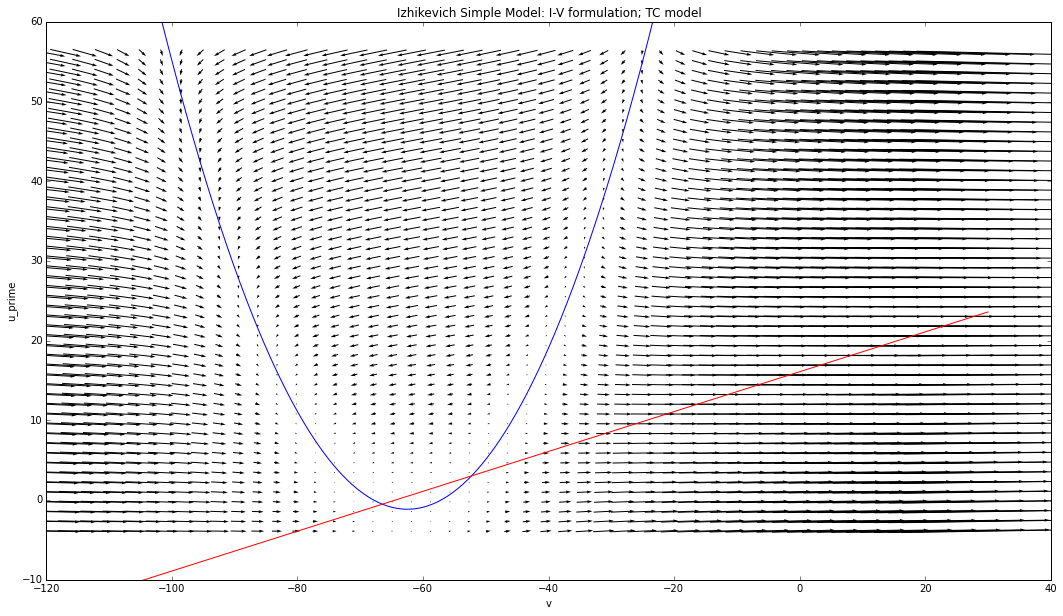

In [81]:
plt.figure(figsize=(18,10))
plt.clf;

Q = plt.quiver(Vg, ugprime, vdot, udotprime*10, pivot='mid', color='k', width=0.001, scale=2000)
lef,rgt,bot,top = plt.axis()
plt.axis([lef, rgt, bot, top])

plt.plot(Vn, nc_vprime, color='b')
plt.plot(Vn, nc_uprime, color='r')

plt.title('Izhikevich Simple Model: I-V formulation; TC model')
plt.xlabel('v');
plt.ylabel('u_prime');

The effect of the scaling is seen, although the form of the model remains the same.

## References

Izhikevich 2003: "Simple Model of Spiking Neurons", IEEE Transactions on Neural Networks, Vol 14, 2003.

Izhikevich 2007: "Dynamical Systems in Neuroscience, The Geometry of Excitability and Bursting", The MIT Press, 2007